# Path with Maximum Probability

# Library

In [1]:
import numpy as np
import pandas as pd

In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import optimization,statistic

%reload_ext autoreload

# Input Data

In [10]:
#buat matriks
n = 4
S = np.ones((n,n))*999

In [11]:
#isi matriks floyd_warshall
S[0,2]=2
S[1,0]=4
S[1,2]=3
S[2,3]=2
S[3,1]=1

# location to matrix

In [75]:
cities = np.array([[35, 51],
                   [113, 213],
                   [82, 280],
                   [322, 340],
                   [256, 352],
                   [160, 24],
                   [322, 145],
                   [12, 349],
                   [282, 20],
                   [241, 8],
                   [398, 153],
                   [182, 305],
                   [153, 257],
                   [275, 190],
                   [242, 75],
                   [19, 229],
                   [303, 352],
                   [39, 309],
                   [383, 79],
                   [226, 343]])

In [76]:
distances = optimization.compute_distances(cities)
pd.DataFrame(distances)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,179.799889,233.773395,407.295961,373.419335,127.882759,302.001656,298.886266,248.937743,210.440015,377.058351,293.470612,237.402612,277.346354,208.386660,178.717654,403.019851,258.031006,349.124620,348.919762
1,179.799889,0.000000,73.824115,244.560831,199.424171,194.756258,219.783985,169.401889,256.534598,241.679540,291.247318,115.000000,59.464275,163.624570,188.904738,95.351980,235.416652,121.210561,301.423290,172.246916
2,233.773395,73.824115,0.000000,247.386338,188.308258,267.619132,275.363396,98.290386,328.024389,315.063486,340.565706,103.077641,74.632433,212.953046,260.048072,81.055537,232.432786,51.865210,361.941984,157.178243
3,407.295961,244.560831,247.386338,0.000000,67.082039,355.105618,195.000000,310.130618,322.490310,341.738204,201.853908,144.308697,188.281704,157.190967,276.812211,322.691803,22.472205,284.692817,268.033580,96.046864
4,373.419335,199.424171,188.308258,67.082039,0.000000,341.760150,217.267117,244.018442,333.016516,344.326880,244.468812,87.664132,140.121376,163.110392,277.353565,267.016853,47.000000,221.219348,301.094669,31.320920
5,127.882759,194.756258,267.619132,355.105618,341.760150,0.000000,202.200396,357.112027,122.065556,82.565126,270.712024,281.859894,233.105126,201.943061,96.566040,248.809164,357.816992,309.622351,229.682389,325.756044
6,302.001656,219.783985,275.363396,195.000000,217.267117,202.200396,0.000000,371.101064,131.244047,159.154013,76.419893,212.602916,202.743681,65.069194,106.301458,314.428052,207.870152,327.085616,89.872131,220.045450
7,298.886266,169.401889,98.290386,310.130618,244.018442,357.112027,371.101064,0.000000,425.606626,410.757836,432.911076,175.601822,168.359734,307.327187,357.737334,120.203993,291.015464,48.259714,458.847469,214.084096
8,248.937743,256.534598,328.024389,322.490310,333.016516,122.065556,131.244047,425.606626,0.000000,42.720019,176.479461,302.034766,269.833282,170.144057,68.007353,335.931541,332.663494,377.584428,116.970082,327.818547
9,210.440015,241.679540,315.063486,341.738204,344.326880,82.565126,159.154013,410.757836,42.720019,0.000000,213.714763,302.803567,264.092787,185.148589,67.007462,313.249102,349.542558,362.498276,158.760826,335.335653


# Floyd Warshall

In [91]:
#hasil matriks floyd_warshall
print("matriks awal\n")
print(S)
dist,nxt,res = optimization.floyd_warshall(S,1,4)
print("\nmatriks floyd_warshall\n")
print(dist)
print("\nresult")
print(res)

matriks awal

[[999. 999.   2. 999.]
 [  4. 999.   3. 999.]
 [999. 999. 999.   2.]
 [999.   1. 999. 999.]]

matriks floyd_warshall

[[0. 5. 2. 4.]
 [4. 0. 3. 5.]
 [7. 3. 0. 2.]
 [5. 1. 4. 0.]]

result
pasangan     jarak    jalur
1 → 4          4      1 → 3 → 4


# Linear Network Models - Shortest Paths

## generate data

In [155]:
test=optimization.shortest_path(get='generate data',n=13)

In [156]:
test

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12
P0,0.0,16.0,0.0,57.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
P1,16.0,0.0,0.0,46.0,0.0,0.0,60.0,86.0,0.0,0.0,0.0,0.0,0.0
P2,0.0,28.0,0.0,0.0,0.0,0.0,44.0,63.0,61.0,0.0,0.0,0.0,0.0
P3,57.0,0.0,0.0,0.0,0.0,0.0,14.0,45.0,41.0,0.0,0.0,0.0,0.0
P4,0.0,45.0,48.0,0.0,0.0,18.0,33.0,0.0,62.0,0.0,0.0,0.0,0.0
P5,51.0,52.0,0.0,42.0,0.0,0.0,51.0,83.0,0.0,0.0,0.0,35.0,0.0
P6,71.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,32.0,0.0
P7,0.0,86.0,63.0,45.0,66.0,0.0,32.0,0.0,4.0,69.0,0.0,0.0,0.0
P8,0.0,0.0,61.0,41.0,62.0,79.0,28.0,0.0,0.0,0.0,13.0,0.0,21.0
P9,0.0,0.0,0.0,40.0,26.0,0.0,41.0,69.0,0.0,0.0,55.0,11.0,80.0


## start = 0 and end = len(n)

In [157]:
optimization.shortest_path(data=test.to_numpy(),get='run',n=13)

,Points,Distance,Cumulative
1,0,0,0
2,3,57,57
3,8,41,98
4,12,21,119


## Shortest Paths with sources

In [193]:
res_1,res_2 = optimization.shortest_path(data=test.to_numpy(),get='run_w_sources',sources=[0,12],n=13)

In [194]:
res_1

,0-Target,Cost,[Path]
0,0,0.0,None
1,1,16.0,"[0, 1]"
2,2,97.0,"[0, 4, 2]"
3,3,57.0,"[0, 3]"
4,4,49.0,"[0, 4]"
5,5,67.0,"[0, 4, 5]"
6,6,71.0,"[0, 3, 6]"
7,7,102.0,"[0, 1, 7]"
8,8,98.0,"[0, 3, 8]"
9,9,113.0,"[0, 4, 5, 11, 9]"


In [195]:
res_2

,12-Target,Cost,[Path]
0,0,119.0,"[12, 8, 3, 0]"
1,1,110.0,"[12, 8, 2, 1]"
2,2,82.0,"[12, 8, 2]"
3,3,62.0,"[12, 8, 3]"
4,4,83.0,"[12, 8, 4]"
5,5,97.0,"[12, 10, 5]"
6,6,49.0,"[12, 8, 6]"
7,7,41.0,"[12, 10, 7]"
8,8,21.0,"[12, 8]"
9,9,79.0,"[12, 11, 9]"


## other data

In [197]:
S

array([[999., 999.,   2., 999.],
       [  4., 999.,   3., 999.],
       [999., 999., 999.,   2.],
       [999.,   1., 999., 999.]])

In [198]:
optimization.shortest_path(data=S,get='run',n=13)

,Points,Distance,Cumulative
1,0,0,0
2,2,2,2
3,3,2,4


In [200]:
res_1,res_2 = optimization.shortest_path(data=S,get='run_w_sources',sources=[0,3])

In [201]:
res_1

,0-Target,Cost,[Path]
0,0,0.0,None
1,1,5.0,"[0, 2, 3, 1]"
2,2,2.0,"[0, 2]"
3,3,4.0,"[0, 2, 3]"


In [202]:
res_2

,3-Target,Cost,[Path]
0,0,5.0,"[3, 1, 0]"
1,1,1.0,"[3, 1]"
2,2,4.0,"[3, 1, 2]"
3,3,0.0,None


## All-Pairs Shortest Path

In [125]:
paths,mat = optimization.shortest_path(data=test.to_numpy(),get='all',n=13)

In [126]:
mat

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12
P0,0.0,30.0,54.0,33.0,42.0,40.0,53.0,78.0,74.0,59.0,102.0,100.0,92.0
P1,30.0,0.0,24.0,3.0,12.0,70.0,83.0,48.0,44.0,70.0,77.0,70.0,103.0
P2,58.0,63.0,0.0,65.0,27.0,71.0,84.0,24.0,28.0,85.0,53.0,54.0,118.0
P3,40.0,70.0,21.0,0.0,9.0,80.0,93.0,45.0,41.0,67.0,74.0,67.0,100.0
P4,31.0,61.0,27.0,64.0,0.0,71.0,84.0,51.0,55.0,58.0,80.0,81.0,91.0
P5,40.0,53.0,71.0,50.0,44.0,0.0,13.0,85.0,89.0,19.0,62.0,71.0,52.0
P6,63.0,42.0,59.0,45.0,32.0,45.0,0.0,72.0,76.0,26.0,49.0,58.0,59.0
P7,69.0,39.0,62.0,41.0,42.0,91.0,88.0,0.0,4.0,98.0,29.0,30.0,99.0
P8,81.0,111.0,62.0,41.0,50.0,97.0,84.0,86.0,0.0,101.0,115.0,26.0,95.0
P9,59.0,72.0,90.0,69.0,63.0,19.0,32.0,95.0,99.0,0.0,69.0,90.0,33.0


# TSP

## generate data

In [72]:
res,points = optimization.tsp(data=None, get='generate data',sources=[None,None],n=13,seed=19)

In [73]:
res

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12
P0,0.0,185.0,255.0,540.0,355.0,193.0,333.0,755.0,415.0,573.0,417.0,451.0,800.0
P1,205.0,0.0,113.0,369.0,259.0,75.0,209.0,611.0,330.0,306.0,352.0,315.0,541.0
P2,313.0,80.0,0.0,240.0,103.0,113.0,136.0,498.0,238.0,380.0,424.0,311.0,441.0
P3,504.0,279.0,261.0,0.0,156.0,323.0,271.0,422.0,35.0,321.0,515.0,355.0,364.0
P4,399.0,242.0,102.0,152.0,0.0,214.0,79.0,527.0,141.0,340.0,271.0,409.0,417.0
P5,149.0,89.0,131.0,380.0,167.0,0.0,159.0,504.0,303.0,427.0,391.0,451.0,626.0
P6,307.0,243.0,120.0,283.0,80.0,167.0,0.0,557.0,222.0,469.0,257.0,412.0,429.0
P7,785.0,506.0,606.0,420.0,639.0,663.0,675.0,0.0,398.0,281.0,846.0,334.0,852.0
P8,426.0,290.0,241.0,36.0,177.0,287.0,249.0,378.0,0.0,315.0,449.0,467.0,509.0
P9,440.0,342.0,335.0,336.0,333.0,380.0,430.0,274.0,345.0,0.0,641.0,110.0,907.0


In [65]:
points

[(87, 6),
 (67, 16),
 (66, 26),
 (51, 45),
 (68, 38),
 (75, 19),
 (77, 34),
 (14, 34),
 (53, 42),
 (35, 14),
 (99, 42),
 (40, 3),
 (73, 80)]

## process

In [66]:
optimization.tsp(data=res.to_numpy(), get='iters',sources=[None,None],n=13,seed=19)

,Iter,value,Tour(s)
0,0,2307,"[[0, 5], [1, 2], [3, 8], [4, 6], [7, 9, 11], [..."
1,1,2735,"[[0, 1, 5], [2, 11, 9, 7, 8, 3, 12, 10, 6, 4]]"
2,2,2749,"[[0, 2, 1, 5], [3, 8, 7], [4, 6, 10, 12], [9, ..."
3,3,2770,"[[0, 11, 9, 7, 8, 3, 12, 10, 6, 4, 2, 1, 5]]"


## result

In [67]:
optimization.tsp(data=res.to_numpy(), get='run',sources=[None,None],n=13,seed=19)

,Nodes,Distance,Cumulative
0,0,0.0,0.0
1,11,451.0,451.0
2,9,123.0,574.0
3,7,274.0,848.0
4,8,398.0,1246.0
5,3,36.0,1282.0
6,12,364.0,1646.0
7,10,403.0,2049.0
8,6,235.0,2284.0
9,4,80.0,2364.0


## TSP-P

A simple variation occurring often is that, instead
of a tour (a closed path), one wants a simple path
covering all vertices. For reference, let’s call this
problem TSP-P

In [68]:
optimization.tsp(data=res.to_numpy(), get='path',sources=[None,None],n=13,seed=19)

,Nodes,Distance,Cumulative
0,12,0.0,0.0
1,10,403.0,403.0
2,6,235.0,638.0
3,5,167.0,805.0
4,0,149.0,954.0
5,1,185.0,1139.0
6,2,113.0,1252.0
7,4,103.0,1355.0
8,8,141.0,1496.0
9,3,36.0,1532.0


## TSP*

A more complex variation is to allow repeated visits to
nodes. For reference, let’s call this problem as TSP*. 

In [69]:
optimization.tsp(data=res.to_numpy(), get='star',sources=[None,None],n=13,seed=19)

,NB 14,Distance,Cumulative
0,0,0.0,0.0
1,11,451.0,451.0
2,9,123.0,574.0
3,7,274.0,848.0
4,8,398.0,1246.0
5,3,36.0,1282.0
6,12,364.0,1646.0
7,10,403.0,2049.0
8,6,235.0,2284.0
9,4,80.0,2364.0


## Held-Karp dynamic programming

In [88]:
optimization.tsp(data=res.to_numpy(), get='held_karp',sources=[None,None],n=13,seed=19)

,Nodes,Distance,Cumulative
0,0,0.0,0.0
1,11,451.0,451.0
2,9,123.0,574.0
3,7,274.0,848.0
4,8,398.0,1246.0
5,3,36.0,1282.0
6,12,364.0,1646.0
7,10,403.0,2049.0
8,6,235.0,2284.0
9,4,80.0,2364.0


# other example

In [12]:
df = pd.read_csv(f"E:/gitlab/machine-learning/dataset/tsp.csv", header=None, index_col=None)

In [13]:
df = df.fillna(0)
df

,0,1,2,3,4,5,6,7,8,9
0,0.0,711.0,107.0,516.0,387.0,408.0,539.0,309.0,566.0,771.0
1,539.0,0.0,769.0,881.0,380.0,546.0,655.0,443.0,295.0,1140.0
2,122.0,752.0,0.0,281.0,441.0,264.0,318.0,448.0,588.0,730.0
3,519.0,875.0,274.0,0.0,435.0,334.0,93.0,776.0,949.0,302.0
4,484.0,561.0,338.0,419.0,0.0,118.0,268.0,607.0,495.0,431.0
5,409.0,406.0,244.0,380.0,93.0,0.0,295.0,544.0,549.0,494.0
6,479.0,735.0,334.0,101.0,345.0,247.0,0.0,679.0,809.0,238.0
7,221.0,444.0,433.0,744.0,487.0,435.0,649.0,0.0,325.0,840.0
8,510.0,303.0,599.0,984.0,531.0,553.0,847.0,350.0,0.0,1001.0
9,663.0,989.0,664.0,335.0,588.0,434.0,297.0,1093.0,1012.0,0.0


In [95]:
optimization.tsp(data=df.to_numpy(), get='iters',sources=[None,None],n=13,seed=19)

,Iter,value,Tour(s)
0,0,2177,"[[0, 2], [1, 7, 8], [3, 6, 9], [4, 5]]"
1,1,2526,"[[0, 2, 7], [1, 8], [3, 6], [4, 9, 5]]"
2,2,2673,"[[0, 2, 3, 6, 9, 5, 4, 1, 8, 7]]"


## result

In [96]:
optimization.tsp(data=df.to_numpy(), get='run',sources=[None,None],seed=19)

,Nodes,Distance,Cumulative
0,0,0.0,0.0
1,2,107.0,107.0
2,3,281.0,388.0
3,6,93.0,481.0
4,9,238.0,719.0
5,5,434.0,1153.0
6,4,93.0,1246.0
7,1,561.0,1807.0
8,8,295.0,2102.0
9,7,350.0,2452.0


## TSP-P

A simple variation occurring often is that, instead
of a tour (a closed path), one wants a simple path
covering all vertices. For reference, let’s call this
problem TSP-P

In [97]:
optimization.tsp(data=df.to_numpy(), get='path',sources=[None,None],seed=19)

,Nodes,Distance,Cumulative
0,1,0.0,0.0
1,8,295.0,295.0
2,7,350.0,645.0
3,0,221.0,866.0
4,2,107.0,973.0
5,5,264.0,1237.0
6,4,93.0,1330.0
7,6,268.0,1598.0
8,3,101.0,1699.0
9,9,302.0,2001.0


## TSP*

A more complex variation is to allow repeated visits to
nodes. For reference, let’s call this problem as TSP*. 

In [98]:
optimization.tsp(data=df.to_numpy(), get='star',sources=[None,None],n=13,seed=19)

,NB 12,Distance,Cumulative
0,0,0.0,0.0
1,2,107.0,107.0
2,3,281.0,388.0
3,6,93.0,481.0
4,9,238.0,719.0
5,5,434.0,1153.0
6,4,93.0,1246.0
7,5,118.0,1364.0
8,1,406.0,1770.0
9,8,295.0,2065.0


## Held-Karp dynamic programming

In [106]:
optimization.tsp(data=df.to_numpy(), get='held_karp',sources=[None,None],n=13,seed=19)

,Nodes,Distance,Cumulative
0,0,0.0,0.0
1,2,107.0,107.0
2,3,281.0,388.0
3,6,93.0,481.0
4,9,238.0,719.0
5,5,434.0,1153.0
6,4,93.0,1246.0
7,1,561.0,1807.0
8,8,295.0,2102.0
9,7,350.0,2452.0


# other example

In [86]:
df = pd.read_csv(f"E:/gitlab/machine-learning/dataset/city.csv", header=None, index_col=None)

In [87]:
S = np.zeros((len(df),len(df)))

In [88]:
df

,0,1,2,3
0,[TCL],33.23,87.62,"Tuscaloosa,AL"
1,[FLG],35.13,111.67,"Flagstaff,AZ"
2,[PHX],33.43,112.02,"Phoenix,AZ"
3,[PGA],36.93,111.45,"Page,AZ"
4,[TUS],32.12,110.93,"Tucson,AZ"
...,...,...,...,...
75,[ALW],46.10,118.28,"Walla Walla,WA"
76,[GRB],44.48,88.13,"Green Bay,WI"
77,[MKE],42.95,87.90,"Milwaukee,WI"
78,[CYS],41.15,104.82,"Cheyenne,WY"


In [89]:
for i in range(len(df)):
    for j in range(len(df)):
        S[i][j] = statistic.distance([df[1][i],df[2][i]],[df[1][j],df[2][j]],types='euclidean')

In [90]:
S

array([[ 0.    , 24.1249, 24.4008, ...,  9.724 , 18.9358, 22.5298],
       [24.1249,  0.    ,  1.7357, ..., 25.0233,  9.1194, 10.7247],
       [24.4008,  1.7357,  0.    , ..., 25.9308, 10.5564, 12.4136],
       ...,
       [ 9.724 , 25.0233, 25.9308, ...,  0.    , 17.0155, 19.1567],
       [18.9358,  9.1194, 10.5564, ..., 17.0155,  0.    ,  4.2103],
       [22.5298, 10.7247, 12.4136, ..., 19.1567,  4.2103,  0.    ]])

In [91]:
optimization.tsp(data=S, get='iters',sources=[None,None],n=13,seed=19)

,Iter,value,Tour(s)
0,0,185,"[[0, 61], [1, 3], [2, 4], [5, 34], [6, 10], [7..."
1,1,216,"[[0, 26, 35], [1, 2, 4], [3, 69, 41, 9, 7, 10,..."
2,2,223,"[[0, 18, 62, 25, 51, 21, 20, 77, 76, 33, 32, 4..."
3,3,226,"[[0, 61, 5, 34, 20, 77, 76, 33, 32, 49, 50, 60..."
4,4,227,"[[0, 35, 26, 65, 63, 66, 64, 53, 24, 22, 40, 2..."
5,5,227,"[[0, 61, 5, 34, 21, 20, 77, 76, 33, 32, 49, 50..."
6,6,227,"[[0, 61, 5, 34, 21, 51, 25, 62, 18, 17, 15, 14..."
7,7,228,"[[0, 35, 26, 65, 63, 66, 64, 53, 24, 22, 40, 2..."
8,8,228,"[[0, 62, 18, 17, 15, 14, 16, 58, 39, 38, 72, 1..."
9,9,229,"[[0, 35, 26, 65, 63, 66, 64, 53, 24, 78, 12, 4..."


In [92]:
optimization.tsp(data=S, get='run',sources=[None,None],n=13,seed=19)

,Nodes,Distance,Cumulative
0,0,0.0000,0.0000
1,35,2.6229,2.6229
2,26,2.2905,4.9134
3,65,5.3203,10.2337
4,63,3.0761,13.3098
...,...,...,...
76,21,1.7385,216.1412
77,34,4.2155,220.3567
78,5,4.0621,224.4188
79,61,2.3861,226.8049


In [93]:
optimization.tsp(data=S, get='path',sources=[None,None],n=13,seed=19)

,Nodes,Distance,Cumulative
0,30,0.0000,0.0000
1,29,2.2192,2.2192
2,28,1.8901,4.1093
3,27,1.4637,5.5730
4,57,0.7547,6.3277
...,...,...,...
75,73,5.0351,209.8939
76,74,1.3695,211.2634
77,54,1.8742,213.1376
78,55,3.2413,216.3789


In [ ]:
optimization.tsp(data=S, get='held_karp',sources=[None,None],n=13,seed=19)

# prism

In [83]:
#buat matriks
n = 9
S = np.zeros((n,n))

In [84]:
#isi matriks floyd_warshall
S[0,1]=4
S[0,7]=8
S[1,2]=8
S[1,7]=11
S[2,3]=7

S[2,5]=2
S[2,8]=4
S[3,4]=9
S[3,5]=14
S[4,5]=10
S[5,6]=2
S[6,8]=6
S[6,7]=1
S[7,8]=7

In [106]:
#hasil matriks floyd_warshall
print("matriks awal\n")
print(S)
res = optimization.prims(S)
print("\n\nmatriks floyd_warshall\n")
res

matriks awal

[[ 0.  4.  0.  0.  0.  0.  0.  8.  0.]
 [ 0.  0.  8.  0.  0.  0.  0. 11.  0.]
 [ 0.  0.  0.  7.  0.  2.  0.  0.  4.]
 [ 0.  0.  0.  0.  9. 14.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 10.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  2.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  6.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  7.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.]]


matriks floyd_warshall



,From,To,Distance,Cumulative
0,0,1,4.0,4.0
1,0,7,8.0,12.0
2,7,8,7.0,19.0
3,1,2,8.0,27.0
4,2,5,2.0,29.0
5,5,6,2.0,31.0
6,2,3,7.0,38.0
7,3,4,9.0,47.0


# Evolutionary-Algorithm 

In [21]:
cities = np.array([[35, 51],
                   [113, 213],
                   [82, 280],
                   [322, 340],
                   [256, 352],
                   [160, 24],
                   [322, 145],
                   [12, 349],
                   [282, 20],
                   [241, 8],
                   [398, 153],
                   [182, 305],
                   [153, 257],
                   [275, 190],
                   [242, 75],
                   [19, 229],
                   [303, 352],
                   [39, 309],
                   [383, 79],
                   [226, 343]])

In [102]:
cities = pd.DataFrame(cities,columns=['long','lat'])
cities

,long,lat
0,35,51
1,113,213
2,82,280
3,322,340
4,256,352
5,160,24
6,322,145
7,12,349
8,282,20
9,241,8


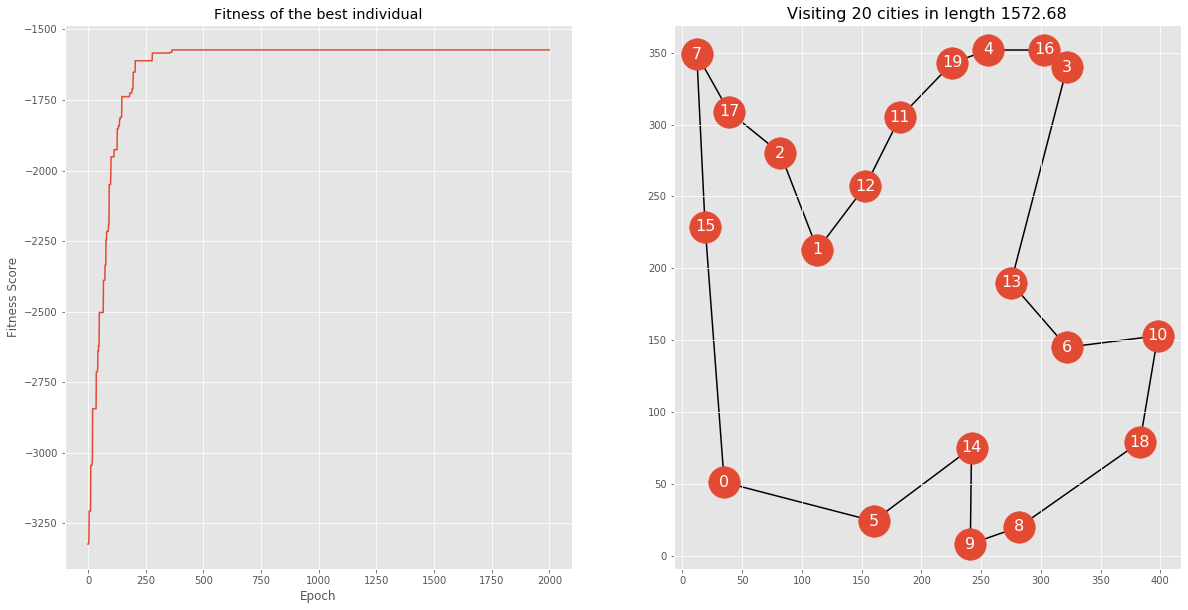

In [79]:
res = optimization.tsp_evo(cities,n_epochs = 2000)

In [80]:
res

,Nodes,Distance,Cumulative
0,0,0.000000,0.000000
1,5,127.882759,127.882759
2,14,96.566040,224.448798
3,9,67.007462,291.456261
4,8,42.720019,334.176279
5,18,116.970082,451.146361
6,10,75.504967,526.651328
7,6,76.419893,603.071220
8,13,65.069194,668.140414
9,3,157.190967,825.331381


# plot result

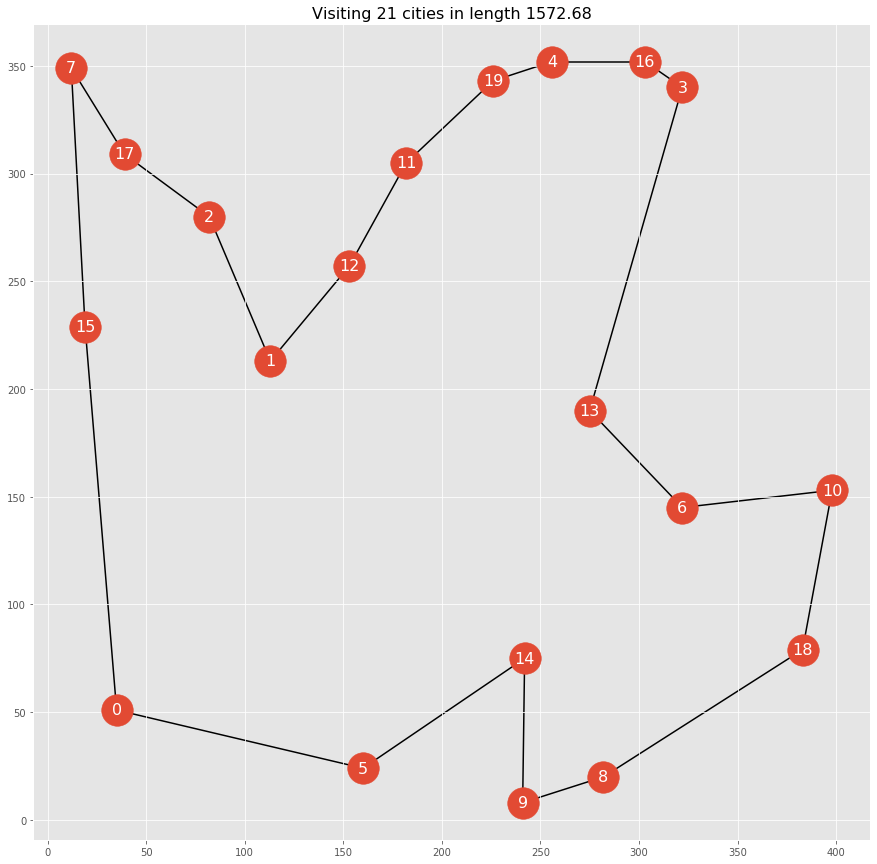

In [99]:
optimization.loc_result(cities,res['Nodes'],res['Cumulative'][len(res)-1])

# testing area

In [18]:
import matplotlib.pyplot as plt
import optunity
import random

In [22]:
def f(x1):
    return 0.0

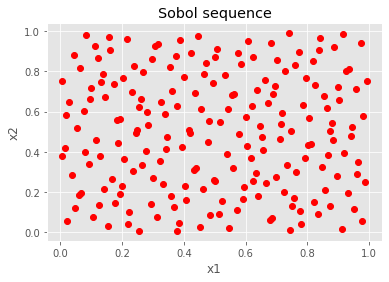

In [20]:
_, info_sobol, _ = optunity.minimize(f, num_evals=200, x1=[0, 1], x2=[0, 1], solver_name='sobol')
plt.plot(info_sobol.call_log['args']['x1'], info_sobol.call_log['args']['x2'], 'ro')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Sobol sequence')
plt.show()

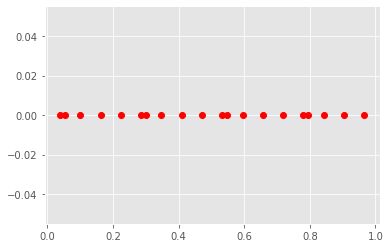

In [31]:
_, info_sobol, _ = optunity.minimize(f, num_evals=20, x1=[0, 1], solver_name='sobol')
plt.plot(info_sobol.call_log['args']['x1'],[0] * 20, 'ro')
# plt.xlim(0,0.2)

In [44]:
def sobol(dim,num_pts,skip,rand):              # generate Sobol sequence
    res = np.array(optunity.solvers.Sobol.i4_sobol_generate(dim, num_pts, skip))
    for i in range(0,len(res)):
        for j in range(0,res.shape[1]):
            res[i,j] = res[i,j]*rand*random.choice([1, -1])
    return(res)

In [45]:
num_pts = 200               # jumlah titik yang dihasilkan dengan sobol sequence
skip = 500                  # jumlah nilai awal yang di skip pada sobol sequence
random.seed(34557)          # random seed
rand = 1                    # area batas titik random dari sobol sequence yang dihasilkan

delta = np.pi/4             # besar rotasi
r = 0.95                    # besar kontraksi

maxiter = 200               # maksimum iterasi

low = np.zeros((maxiter,2))

#memanggil fungsi optimasi dengan metode spiral
res = sobol(2,num_pts,skip,rand)

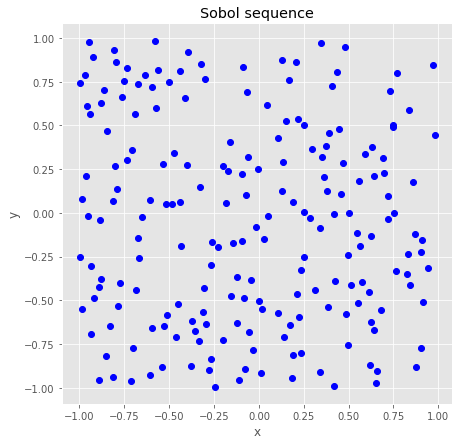

In [47]:
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111)
ax1.plot(res[:,0],res[:,1], 'ob')

plt.xlabel("x")
plt.ylabel("y")
# plt.xlim(0,1)
# plt.ylim(0,1)
plt.grid(True)
plt.savefig('contour_sobol.png')
plt.title('Sobol sequence')
plt.draw()

In [37]:
#memanggil fungsi optimasi dengan metode spiral
res = sobol(1,num_pts,skip,rand)

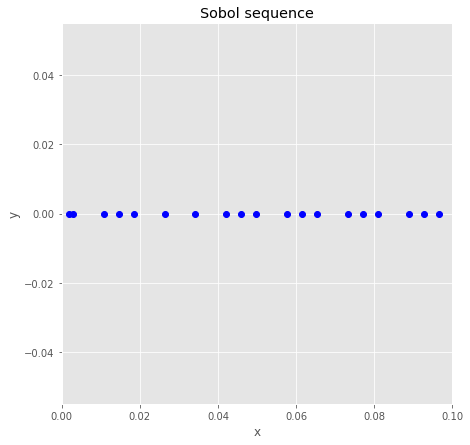

In [40]:
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111)
ax1.plot(res[:,0],[0]*200, 'ob')

plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0,0.1)
# plt.ylim(-10,10)
plt.grid(True)
plt.savefig('contour_sobol.png')
plt.title('Sobol sequence')
plt.draw()

In [45]:
res

array([[4.39453125e-01, 6.44531250e-02],
       [9.39453125e-01, 5.64453125e-01],
       [6.89453125e-01, 3.14453125e-01],
       [1.89453125e-01, 8.14453125e-01],
       [1.26953125e-01, 1.26953125e-01],
       [6.26953125e-01, 6.26953125e-01],
       [8.76953125e-01, 3.76953125e-01],
       [3.76953125e-01, 8.76953125e-01],
       [2.51953125e-01, 2.51953125e-01],
       [7.51953125e-01, 7.51953125e-01],
       [5.01953125e-01, 1.95312500e-03],
       [1.95312500e-03, 5.01953125e-01],
       [2.92968750e-03, 2.50976562e-01],
       [5.02929688e-01, 7.50976562e-01],
       [7.52929688e-01, 9.76562500e-04],
       [2.52929688e-01, 5.00976562e-01],
       [3.77929688e-01, 1.25976562e-01],
       [8.77929688e-01, 6.25976562e-01],
       [6.27929688e-01, 3.75976562e-01],
       [1.27929688e-01, 8.75976562e-01],
       [1.90429688e-01, 6.34765625e-02],
       [6.90429688e-01, 5.63476562e-01],
       [9.40429688e-01, 3.13476562e-01],
       [4.40429688e-01, 8.13476562e-01],
       [3.154296